In [5]:
#결측값에 대해 계속 공부
import pandas as pd
import numpy as np
from pandas import DataFrame

In [6]:
df=pd.DataFrame(np.random.randn(5,3), columns=['c1','c2','c3'])
df
df.ix[0,0]=np.nan #None
df

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,c1,c2,c3
0,NaN,-0.852403,2.075051
1,-0.332987,0.648999,1.653954
2,-0.281188,-0.985340,-0.181560
3,-2.664560,-0.038247,2.152786
4,-1.202554,-0.032936,0.290433


In [36]:
df.ix[1,['c1','c3']]=np.nan
df
df.ix[2,['c2']]=None
df.ix[3,['c3']]=None
df.ix[4,['c3']]=None
df

,c1,c2,c3
0,NaN,0.607380,0.976479
1,NaN,-0.048485,NaN
2,0.631123,NaN,-1.434357
3,-0.766249,0.561580,NaN
4,0.618963,-0.801292,NaN


In [32]:
import warnings
warnings.filterwarnings(action='ignore')

In [35]:
#Nan을 0으로 대체, na = not avilable
df.fillna(0)
# df.fillna(method="ffill")
# df.fillna(method="bfill")

,c1,c2,c3
0,0.000000,0.607380,0.976479
1,0.000000,-0.048485,0.000000
2,0.631123,0.000000,-1.434357
3,-0.766249,0.561580,0.000000
4,0.618963,-0.801292,0.000000


In [38]:
df
#Nan을 평균값으로 대체
df.fillna(df.mean())

,c1,c2,c3
0,0.161279,0.607380,0.976479
1,0.161279,-0.048485,-0.228939
2,0.631123,0.079796,-1.434357
3,-0.766249,0.561580,-0.228939
4,0.618963,-0.801292,-0.228939


In [40]:
df.mean()

c1    0.161279
c2    0.079796
c3   -0.228939
dtype: float64

In [111]:
#numpy where function
df.where(pd.notnull(df), df.mean(),axis='columns') #where다음에 조건 설정)
df.fillna(df.mean()['c1'])

,c1,c2,c3
0,-0.040803,0.995350,-1.052852
1,-1.222863,1.150229,0.759840
2,-0.659529,0.181331,0.951149
3,-0.254506,0.992100,-1.584498
4,1.973686,-1.586709,0.644006


In [114]:
arr=np.array([1,2,3,10,20,30,0.1,0.2])
#arr.min() #최소값0.1
np.min(arr)#최소값0.1
np.argmin(arr) # 최소값의 위치, index
np.max(arr)#최대값
np.argmax(arr)#최대값의 index
np.where(arr<1)#(array([6, 7], dtype=int64),)
#where함수는 조건문 사용-> 출력값:인덱스
np.where(arr>=10) #(array([3, 4, 5], dtype=int64),)
np.where(arr>=10,0,arr) #array([1. , 2. , 3. , 0. , 0. , 0. , 0.1, 0.2])
#np.where(조건, 참, 거짓)
np.where(arr>=10,0,1) #10보다 크면 0, 작으면 1
np.where(arr>=10,arr*0.1, arr)

array([1. , 2. , 3. , 0. , 0. , 0. , 0.1, 0.2])

In [115]:
df.mean()['c1':'c2']

# c1    0.161279
# c2    0.079796
# dtype: float64

df.fillna(df.mean()['c1':'c2'])

,c1,c2,c3
0,-0.040803,0.995350,-1.052852
1,-1.222863,1.150229,0.759840
2,-0.659529,0.181331,0.951149
3,-0.254506,0.992100,-1.584498
4,1.973686,-1.586709,0.644006


In [93]:
df2=pd.DataFrame({'c1':[1,2,3,4,5],'c2':[6,7,8,9,10]})
df2.ix[[1,3], ['c2']] = np.nan
#c2p 열에는 c2열 값이 notnull이면 c2열 값을
#c2열 값이 null이면 c1열 값으로 채우고자 함
df2['c2p']=np.where(pd.notnull(df2['c2'])==True, 
                    df2['c2'],df2['c1'])
df2

for i in df2.index:
    if pd.notnull(df2.ix[i,'c2'])==True:
        df2.ix[i,'c2p']=df2.ix[i,'c2']
    else:
        df2.ix[i,'c2p']=df2.ix[i,'c1']
df2

,c1,c2,c2p
0,1,6.0,6.0
1,2,NaN,2.0
2,3,8.0,8.0
3,4,NaN,4.0
4,5,10.0,10.0


In [98]:
#dropna 메서드: 열(axis=1)/행(axis=0) 제거

df3=pd.DataFrame({'c1':[1,2,3,4,5],'c2':[6,7,8,9,10]})
df3.ix[[1,3], ['c2']] = np.nan
df3


,c1,c2
0,1,6.0
1,2,NaN
2,3,8.0
3,4,NaN
4,5,10.0


In [104]:
#dropna 행, 열 제거
df3.dropna(axis=0)#결측값이 있는 행 전체 제거
df3.dropna(axis=1)#결측값이 있는 열 전체 제거
df3[['c1','c2']].dropna()#해당 열에 대해 dropna 적용 #dr.dropna(axis=0)
#axis=0 default


,c1,c2
0,1,6.0
2,3,8.0
4,5,10.0


In [115]:
#결측값 보간(interpolate)
"""
1) 시계열 데이터에 대해 선형적으로 비례하는 값
2) 이미지 보간: 그라데이션과 비슷
-> 추이를 보고 비슷하게 맞추는 것
"""
from datetime import datetime
#datetime 모듈에 있는 datetime 함수
#시간이나 날짜 -> 시계열 데이터
dateStr=['1/13/2020', '1/16/2020', '1/17/2020', '1/20/2020']
dates=pd.to_datetime(dateStr)
dates

DatetimeIndex(['2020-01-13', '2020-01-16', '2020-01-17', '2020-01-20'], dtype='datetime64[ns]', freq=None)

In [116]:
ts=pd.Series([1,np.nan, np.nan, 10], index=dates)
ts

2020-01-13     1.0
2020-01-16     NaN
2020-01-17     NaN
2020-01-20    10.0
dtype: float64

In [119]:
tslr=ts.interpolate(method='values') #method='values' default
#method='values': 선형적으로 비례하게 결측값 보간
tslr

2020-01-13     1.000000
2020-01-16     4.857143
2020-01-17     6.142857
2020-01-20    10.000000
dtype: float64

In [125]:
tsTime=ts.interpolate(method='time') # limit=1) #1개만 보간하고 싶을때
tsTime
#날짜의 크기에 따라 선형적으로 값을 보간.



2020-01-13     1.000000
2020-01-16     4.857143
2020-01-17     6.142857
2020-01-20    10.000000
dtype: float64

In [ ]:
#na를 대체: fillna, replace 
#fillna(na값들 다른것을 대체):na를 다른 값으로 대체
#replace:na뿐만아니라 다른 모든 값에 대해서 대체 가능.(광범위)
#결측값/실측값 대상 데이터 교체


In [133]:
s=pd.Series([1,2,3,4,np.nan])
s

#replace: 결측값/실측값 변경
s.replace(3,9) #실측값 변경. 값 3 -> 값 9
s
s.replace(np.nan, 5)#nan의 값을 5로

s.replace([1,2,3],[6,7,8]) #1대1 매칭 된다. 인덱스 1번 - 6, 각각의 대응도 가능.
s.replace([1,2,3,np.nan],[10,20,30,99]) #리스트로 나타내서 고칠수도 있다.

s.replace({1:5, 3:30, np.nan:99})#딕셔너리 형태 #{원래값: 변경값}



0     5.0
1     2.0
2    30.0
3     4.0
4    99.0
dtype: float64

In [135]:
#데이터프레임에서 replace 적용
df4=pd.DataFrame({'c1':['aaa','b','c','d'], 
                  'c2':[1,2,3,4],
                  'c3': [5,6,7,np.nan]})
df4

,c1,c2,c3
0,aaa,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [137]:
df4.replace({'c1':'aaa'},{'c1':'bbb'})
df4.replace({'c3':np.nan},{'c3':99})




,c1,c2,c3
0,aaa,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,99.0


In [ ]:
#병합;중복데이터가 발생. 정확도가 떨어진다
#중복데이터 여부: duplicated()
#중복데이터 처리: drop_duplicates() 한개만 남겨두고 제거해라


In [5]:
df5= pd.DataFrame({'k1':['a','b','b','c','c'],
                   'k2':['x','y','y','x','z'],
                   'col':[10,20,30,40,50]
                  })
df5

,k1,k2,col
0,a,x,10
1,b,y,20
2,b,y,30
3,c,x,40
4,c,z,50


In [118]:
df5.duplicated(['k1'])
df5.duplicated(['k2'])
df5.duplicated(['k1','k2'])



0    False
1    False
2     True
3    False
4    False
dtype: bool

In [121]:
df5.duplicated(['k1'],keep='first') #first 첫번째꺼만 중복으로 안보고 나머진 중복처리 #keep='first' default
df5.duplicated(['k1'],keep='last')# last는 중복 시작된 첫번째껄 나타냄
df5.duplicated(['k1'],keep=False)#w중복은 모두 True

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [125]:
#중복값 제거(1개만 살리고 나머진 중복은 제거.)
df5.drop_duplicates(['k1'], keep="first")
df5.drop_duplicates(['k1'], keep="last")
df5.drop_duplicates(['k1'], keep=False)


,k1,k2,col
0,a,x,10


In [9]:
#유일한 값: unique()
#유일한 값 개수 세기: value_counts()


In [128]:
df6=pd.DataFrame({
    'a':['a1','a1','a2','a2','a3'],
    'b':['b1','b1','b2','b2',np.nan],
    'c':[1,1,3,4,4]
})
df6['a'].unique()
df6['b'].unique()
df6['c'].unique()



array([1, 3, 4], dtype=int64)

In [14]:
help(pd.Series.unique)

Help on function unique in module pandas.core.series:

unique(self)
    Return unique values of Series object.
    
    Uniques are returned in order of appearance. Hash table-based unique,
    therefore does NOT sort.
    
    Returns
    -------
    ndarray or ExtensionArray
        The unique values returned as a NumPy array. See Notes.
    
    See Also
    --------
    unique : Top-level unique method for any 1-d array-like object.
    Index.unique : Return Index with unique values from an Index object.
    
    Notes
    -----
    Returns the unique values as a NumPy array. In case of an
    extension-array backed Series, a new
    :class:`~api.extensions.ExtensionArray` of that type with just
    the unique values is returned. This includes
    
        * Categorical
        * Period
        * Datetime with Timezone
        * Interval
        * Sparse
        * IntegerNA
    
    See Examples section.
    
    Examples
    --------
    >>> pd.Series([2, 1, 3, 3], name='A').uniqu

In [131]:
#유일값 개수 세기
#help(pd.Series.value_counts)
#normalize=디폴트(False):개수, True: 상대비율
#df6['a'].value_counts(normalize=False)
#normalize=False:디폴트
#sort=True: 개수 기준 정렬
df6['a'].value_counts(normalize=False, sort=True, ascending=False)



a2    2
a1    2
a3    1
Name: a, dtype: int64

In [19]:
df6['a'].value_counts(normalize=True)
#normalize=디폴트(False):개수, True:상대비율
#df['a'].value_counts(normalize=False)

a2    0.4
a1    0.4
a3    0.2
Name: a, dtype: float64

In [22]:
df6

,a,b,c
0,a1,b1,1
1,a1,b1,1
2,a2,b2,3
3,a2,b2,4
4,a3,NaN,4


In [23]:
df6['c'].value_counts(sort=True, ascending=False)
#default: sort=True, ascending=False
#유일한 값의 개수를 기준으로 내림차순



4    2
1    2
3    1
Name: c, dtype: int64

In [24]:
#유일한 값의 개수를 기준으로 오름차순
df6['c'].value_counts(sort=True, ascending=True)


3    1
1    2
4    2
Name: c, dtype: int64

In [25]:
#정렬 기준이 없음
df6['c'].value_counts(sort=False)

1    2
3    1
4    2
Name: c, dtype: int64

In [134]:
df6['b'].value_counts()
#default: dropna=True. na를 제외한 값들을 Count
df6['b'].value_counts(dropna=False)

df6['c'] #1 1 3 4 4
#group 별 데이터 개수 세기
df6['c'].value_counts(bins=[0,1,2,3,4,5] ,sort=False)

# (): 개구간(포함안됨), []:폐구간(포함됨)
#bins 구간 나누는 옵션.

#동일한 결과를 도출하는 코드
#res=pd.cut(df6['c'], bins=[0,1,2,3,4,5])
#pd.value_counts(res)

(-0.001, 1.0]    2
(1.0, 2.0]       0
(2.0, 3.0]       1
(3.0, 4.0]       2
(4.0, 5.0]       0
Name: c, dtype: int64

In [ ]:
#변수들 간 척도가 다른 경우 데이터 표준화
#변수들의 척도에 의해 모델링시 왜곡이 많다. 
#모집단:전체 집단
#모집단에서 표본추출-> 표본집단 평균, 표준편차
#-> 통계랑 => 모평균, 모분산(모수, parameter) 추정


"""
모수적방법
중심 극한 정리:무작위 복원 추출하면, 연속형
자료의 평균에 대한 분포는 정규분포를 띈다면
- 30개 이상의 표본의 경우에 정규분포를 따른다. 가정


비모수적방법
-10개 미만의 표본의 경우에는 모수적 방법을 사용하지 못함
-자료 크기로 나열->순위 매김=> 차이 비교


"""


In [ ]:
"""
표준화: (각 데이터 - 평균) / 표준편차
모집단이 정규분포를 따르는 경우에,
평균:0, 표준편차:1인 표준정규분포로 표준화하는작업
1)numpy 2)scipy.stats:zscore 3)sklearn.preprocessing



"""

In [52]:
from numpy import *# numpy안에 있는 모든 모듈 불러오기

In [40]:
np.random.randint(30) # 0~29까지 integ하게 int 값 생성,

25

In [7]:
data=np.random.randint(30,size=(6,5))
data

array([[ 9, 27, 17, 14, 27],
       [ 7,  5, 25, 20,  7],
       [23,  5, 26, 11, 21],
       [24, 19,  4,  9, 21],
       [20,  5,  7, 13, 20],
       [20,  2, 19, 18,  1]])

In [ ]:
#유클리디안 거리(다 차원)
#피타고라스 정리(2 차원)

In [ ]:
#data_std=squrt{{}
#표준편차:np.std()

In [153]:
#표준화=(각 데이터-평균 (각 열)) / std(각 열)
# np.mean(data)
# np.mean(data,axis=0) #각 열 평균
# np.mean(data,axis=1) #각 행 평균
# print(np.mean(data, axis=0))
# print('='*30)
# print(np.mean(data, axis=1))
# print('='*30)
# print(data-np.mean(data, axis=0))
      
      
np.std(data) #8.288479 #전체 data에 대한 표준편차
np.std(data, axis=0) # 각 열에 대한 표준편차
std_data=(data-np.mean(data, axis=0))/np.std(data,axis=0)
print(std_data)      
#std_mean -> 평균 0, std 표준편차 -> 1
      

[[ 1.80893651  0.71312238  1.10227038 -2.17262047 -1.78443563]
 [-1.01300445  1.2265705  -0.12247449  0.28968273 -0.81110711]
 [-0.57885968 -1.16952071 -1.59216833  0.86904819  0.64888568]
 [-1.01300445  0.19967427 -0.9797959   0.14484136  0.16222142]
 [ 0.50650222 -1.51181945  0.85732141  0.28968273  0.64888568]
 [ 0.28942984  0.54197301  0.73484692  0.57936546  1.13554995]]


In [155]:
#print(std_data)
print(np.mean(std_data, axis=0))#평균
print(np.std(std_data, axis=0))#표준편차
print(np.var(std_data, axis=0)) #분산

[-2.59052039e-16 -9.25185854e-17  0.00000000e+00 -1.85037171e-17
  3.33066907e-16]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]


In [53]:
import scipy.stats as ss

In [156]:
#scipy 안에 stats 통계 모듈
# 왜 쓰는지에 대해 알아야 한다. 어떻게 쓰는지
#2번째 방법
data_ss=ss.zscore(data)
data_ss

array([[ 1.80893651,  0.71312238,  1.10227038, -2.17262047, -1.78443563],
       [-1.01300445,  1.2265705 , -0.12247449,  0.28968273, -0.81110711],
       [-0.57885968, -1.16952071, -1.59216833,  0.86904819,  0.64888568],
       [-1.01300445,  0.19967427, -0.9797959 ,  0.14484136,  0.16222142],
       [ 0.50650222, -1.51181945,  0.85732141,  0.28968273,  0.64888568],
       [ 0.28942984,  0.54197301,  0.73484692,  0.57936546,  1.13554995]])

In [8]:
#3번째 방법
from sklearn.preprocessing import * 

In [9]:
ss_data=StandardScaler().fit_transform(data) # scalling 한다.
ss_data

array([[-1.22461737,  1.79407893,  0.08012831, -0.0438108 ,  1.19532966],
       [-1.52452366, -0.59802631,  1.041668  ,  1.53337784, -1.01143279],
       [ 0.87472669, -0.59802631,  1.16186047, -0.83240511,  0.53330092],
       [ 1.02467984,  0.92422248, -1.4823737 , -1.35813466,  0.53330092],
       [ 0.42486725, -0.59802631, -1.12179631, -0.30667557,  0.4229628 ],
       [ 0.42486725, -0.92422248,  0.32051323,  1.00764829, -1.67346152]])

In [ ]:
#예외적인 값(이상치, 특이값, outlier)이 들어있는 데이터 표준화
#표준정규분포로의 표준화:이상치, 특이값이 없어야 한다는 가정 필요
##z=(x-mean)/std

#이상치가 데이터에 포함되어 있는 경우에는
#표준화를 어떻게?
#1) 이상치, 특이값을 찾아서 제거- 조건문생성, 수식 만들어야 한다.
#이상치, 특이값에서 
#2)중앙값(median), IQR을 이용하여 스케일링


In [ ]:
#RobustScaler(): 이상치가 있는 데이터 표준화



In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

In [11]:
mu, sigma=5,2
x=mu+sigma*np.random.randn(100)
x

array([ 2.68447525,  3.41812967,  7.19217488,  6.23322863,  5.23708472,
        7.38498668,  6.41693968,  6.57324507,  7.61289113,  2.13514856,
        8.65641247,  3.99002803,  5.90427583,  3.51428471,  5.66899497,
        5.86776701,  5.7876785 ,  6.93884394,  7.22114107,  7.61287461,
        4.23421881,  8.30206542,  3.26171501,  4.34819956,  6.47733576,
        5.19956131,  7.12831925,  2.28976974,  6.96433117,  4.61739963,
        5.83199727,  4.12704926,  4.33791748,  5.40824318,  8.91303774,
        3.49834567,  3.21813676,  8.67217854,  3.87762662,  6.63289073,
        8.30304588,  8.86814423,  5.58973303,  6.52083564,  4.05383959,
       -0.01609399,  5.04844735,  4.06205632,  4.85483497,  6.15078158,
        4.90751243,  2.00203957,  3.78862438,  6.24619476,  6.03402706,
        3.39985968,  3.77521215,  5.27572307,  1.97307366,  5.41252821,
        7.49752109,  5.3156672 ,  3.73500487,  6.07227898,  7.36879947,
        8.52033922,  3.32106735,  5.52196311,  7.20239191,  6.96

1.7738308920162056

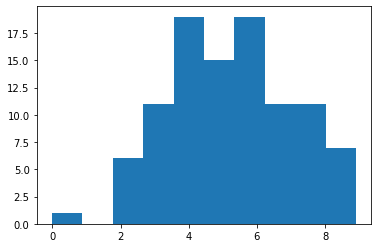

In [14]:
plt.hist(x)
np.mean(x)
np.std(x)

In [15]:
x[98:100] =100
x

array([ 2.68447525e+00,  3.41812967e+00,  7.19217488e+00,  6.23322863e+00,
        5.23708472e+00,  7.38498668e+00,  6.41693968e+00,  6.57324507e+00,
        7.61289113e+00,  2.13514856e+00,  8.65641247e+00,  3.99002803e+00,
        5.90427583e+00,  3.51428471e+00,  5.66899497e+00,  5.86776701e+00,
        5.78767850e+00,  6.93884394e+00,  7.22114107e+00,  7.61287461e+00,
        4.23421881e+00,  8.30206542e+00,  3.26171501e+00,  4.34819956e+00,
        6.47733576e+00,  5.19956131e+00,  7.12831925e+00,  2.28976974e+00,
        6.96433117e+00,  4.61739963e+00,  5.83199727e+00,  4.12704926e+00,
        4.33791748e+00,  5.40824318e+00,  8.91303774e+00,  3.49834567e+00,
        3.21813676e+00,  8.67217854e+00,  3.87762662e+00,  6.63289073e+00,
        8.30304588e+00,  8.86814423e+00,  5.58973303e+00,  6.52083564e+00,
        4.05383959e+00, -1.60939945e-02,  5.04844735e+00,  4.06205632e+00,
        4.85483497e+00,  6.15078158e+00,  4.90751243e+00,  2.00203957e+00,
        3.78862438e+00,  

(array([ 1., 24., 38., 27.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

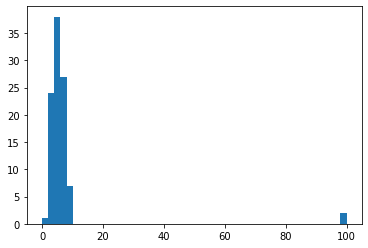

In [19]:
np.mean(x)
#np.std(x) #13.422687450667636
#plt.hist(x)
plt.hist(x, bins=np.arange(0, 102, 2))

(array([98.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.53558685,  0.21182572,  0.9592383 ,  1.70665087,  2.45406345,
         3.20147602,  3.9488886 ,  4.69630117,  5.44371375,  6.19112633,
         6.9385389 ]),
 <a list of 10 Patch objects>)

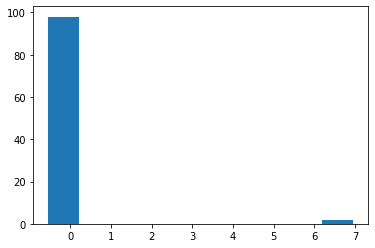

In [20]:
#type(x)  # array
#x가 1차원이다.
#x=x.reshape(100,1) #(100,) -> (100,1) 열은 1로 고정
x=x.reshape(-1,1) # 내가 행을 모를때, 자동으로 할땐 -1. 
x.shape

ss_x=StandardScaler().fit_transform(x)# 2D만 사용 가능하다.
#모양을 2D로 바꿔줬다.
np.mean(ss_x)
np.std(ss_x)
plt.hist(ss_x)


(array([ 0.,  0.,  0.,  0.,  1.,  0.,  7., 28., 24., 21., 12.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

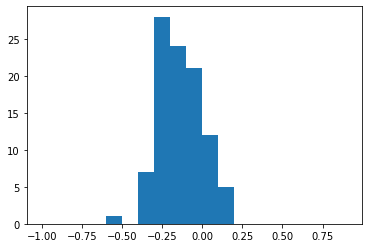

In [29]:
ss_x_z=ss_x[ss_x<5]
plt.hist(ss_x_z, bins=np.arange(-1,1,0.1))
#plt.hist(ss_x_z)


In [101]:
#이상치 포함 데이터의 중앙값, IQR을 이용 -> 표준화
np.median(x)
x
q1=np.percentile(x,25)#1사분위수, 3.87832
q3=np.percentile(x,75) #3사분위수, 6.470561
iqr=q3-q1 #2.59223
iqr
#q3

2.5922359742480108

(array([0., 1., 6., 6., 5., 5., 6., 2., 4., 7., 7., 5., 4., 4., 5., 2., 4.,
        7., 3.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

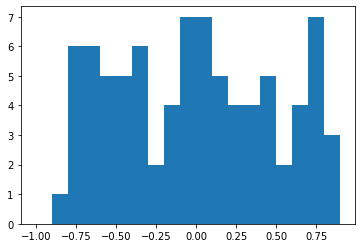

In [30]:
import matplotlib.pyplot as plt
x_rs=RobustScaler().fit_transform(x) # Robuster-> 중의수, IQR이 표준편차
x_rs
np.median(x_rs)# 0.0
np.mean(x_rs)#0.677
np.std(x_rs)#5.17803
#plt.hist(x_rs)

x_rs_z=x_rs[x_rs<10]
plt.hist(x_rs_z, bins=np.arange(-1,1,0.1))



In [33]:
#문제 1번 
import numpy as np
arr=np.array([[10,20,30,40],[50,60,70,80]])
arr

array([[10, 20, 30, 40],
       [50, 60, 70, 80]])

In [49]:
#문제 2번
m = np.array([[ 0,  1,  2,  3,  4],
              [ 5,  6,  7,  8,  9],
              [10, 11, 12, 13, 14]])
m[1,2] #7
m[2,4] #14
m[1,[1,2]] #array([6, 7])
m[[1,2],2] #array([ 7, 12])
m[0:2,[3,4]]#array([[3, 4],[8, 9]])



array([[3, 4],
       [8, 9]])

In [58]:
# 문제 3번
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
              11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
x[x%3 ==0] #array([ 3,  6,  9, 12, 15, 18])
x[x%4==1] #array([ 1,  5,  9, 13, 17])
a=x%3 ==0
b=x%4==1
x[a & b] #array([9])



array([9])

In [ ]:
#4. 타이타닉 데이터셋에서 Age , sibsp, parch, fare 컬럼에 대해 표준화 하시오.
#-누락값에 대해서는 Age열은 평균 나이로 대체,




In [59]:
re_list4=list(map(str,input("Reverse list: ")))
for char in range(len(re_list4)-1, -1,-1):
    print(re_list4[char],end=" ")

Reverse list: df123
3 2 1 f d 